## Business Problem: ### This is a peer comparison project. Suppose that you are working for Samsung in customer experience management team. The idea is to regularly monitor the customer satisfaction levels and peer company moves. The competitor company is Apple.

### Q. The objective is to test below hypothesis. You are required to prove/disprove them using hypothesis testing with the help of data set provided. 

In [2]:
import pandas as pd
import numpy as np
stats1=pd.read_csv(r"C:\Users\Bahroz Kalam\Desktop\Python\PYTHON CASE STUDY\Basic Statistics-Questions.csv")
stats1

,S_No,Cust_id,Mobile Brand Purchased,Location,Satisfaction Score,Mobile Cost
0,1,S336499,Samsung,BLR,94,75000
1,2,S73004,Samsung,GGN,99,62000
2,3,S79537,Samsung,GGN,74,52000
3,4,S769168,Samsung,GGN,74,63000
4,5,S609791,Samsung,CHE,83,66000
...,...,...,...,...,...,...
195,196,A285629,Apple,BLR,87,52000
196,197,A324151,Apple,GGN,82,90000
197,198,A292091,Apple,CHE,88,64000
198,199,A936566,Apple,CHE,91,72000


##### 1. The Samsung Average customer satisfaction score is minimum 75%.

In [3]:
import pandas as pd
from scipy import stats

# Extract Samsung Data
samsung_data = stats1[stats1['Mobile Brand Purchased'] == 'Samsung']

# Calculate the mean satisfaction score for Samsung
samsung_mean = samsung_data['Satisfaction Score'].mean()

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(samsung_data['Satisfaction Score'], 75)

# Output the results
print("Samsung Mean Satisfaction Score:", samsung_mean)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if we can reject the null hypothesis
if p_value < 0.05:
    print("We reject the null hypothesis. The average satisfaction score is significantly different from 75.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference from 75.")


Samsung Mean Satisfaction Score: 84.9
T-statistic: 8.358287450922418
P-value: 4.0739777034636007e-13
We reject the null hypothesis. The average satisfaction score is significantly different from 75.


##### 2. The overall average satisfaction score of Samsung is same as Apple. There is no significant difference in the satisfaction scores  - 10 Marks

In [5]:
samsung_data = stats1[stats1['Mobile Brand Purchased'] == 'Samsung']
apple_data = stats1[stats1['Mobile Brand Purchased'] == 'Apple']


In [6]:
from scipy import stats

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(samsung_data['Satisfaction Score'], apple_data['Satisfaction Score'])

# Output the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if we can reject the null hypothesis
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant difference in the satisfaction scores between Samsung and Apple.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the satisfaction scores between Samsung and Apple.")


T-statistic: -1.9064295935043472
P-value: 0.058042614444118075
We fail to reject the null hypothesis. There is no significant difference in the satisfaction scores between Samsung and Apple.


##### 3. There is strong relationship between Location & Mobile Brand Purchase (i.e Specific brand purchasing more in certain locations)

In [18]:
# Import necessary libraries
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Create a contingency table
contingency_table = pd.crosstab(df['Location'], df['Mobile Brand Purchased'])
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis: There is a significant relationship between Location and Mobile Brand Purchased.")
else:
    print(f"\nFail to reject the null hypothesis: There is no significant relationship between Location and Mobile Brand Purchased.")


Contingency Table:
Mobile Brand Purchased  Apple  Samsung
Location                              
BLR                        24       22
CHE                        34       34
GGN                        32       36
HYD                        10        8

Chi-Square Test Results:
Chi-Square Statistic: 0.5444728616084115
P-Value: 0.9090177469316534
Degrees of Freedom: 3
Expected Frequencies Table:
[[23. 23.]
 [34. 34.]
 [34. 34.]
 [ 9.  9.]]

Fail to reject the null hypothesis: There is no significant relationship between Location and Mobile Brand Purchased.


##### 4. There is strong relationship between cost of the phone and Satisfaction score

In [19]:
# Import necessary libraries
import pandas as pd
from scipy.stats import pearsonr

# Compute Pearson's correlation coefficient
corr_coefficient, p_value = pearsonr(df['Mobile Cost'], df['Satisfaction Score'])

print(f"Pearson's Correlation Coefficient: {corr_coefficient}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis: There is a significant linear relationship between Mobile Cost and Satisfaction Score.")
else:
    print(f"\nFail to reject the null hypothesis: There is no significant linear relationship between Mobile Cost and Satisfaction Score.")


Pearson's Correlation Coefficient: -0.0412152060798132
P-Value: 0.562276217836564

Fail to reject the null hypothesis: There is no significant linear relationship between Mobile Cost and Satisfaction Score.


##### 5. Certain locations having high satisfaction score

In [20]:
# Import necessary libraries
import pandas as pd
from scipy.stats import f_oneway

# Group data by location and calculate satisfaction score for each location
grouped = df.groupby('Location')['Satisfaction Score'].apply(list)

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped)

print(f"ANOVA F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis: There are significant differences in satisfaction scores between locations.")
else:
    print(f"\nFail to reject the null hypothesis: There are no significant differences in satisfaction scores between locations.")


ANOVA F-Statistic: 1.8078235781915044
P-Value: 0.14704232267382497

Fail to reject the null hypothesis: There are no significant differences in satisfaction scores between locations.


### Q. Write User Defined Function which can take input as any variable and output as follows. Test them on different columns

#### a. For categorical variables, the output will be number of distinct categories with frequency, number of missing's, percentage of missing's

In [11]:
stats1.dtypes

S_No                       int64
Cust_id                   object
Mobile Brand Purchased    object
Location                  object
Satisfaction Score         int64
Mobile Cost                int64
dtype: object

In [17]:
def categorical_variable_summary(column):
    if column.dtype == 'object':
        # Count distinct categories and their frequencies
        category_counts = column.value_counts()
        num_distinct_categories = category_counts.size
        
        # Count number of missing values
        num_missing = column.isnull().sum()
        
        # Calculate percentage of missing values
        total_values = len(column)
        percent_missing = (num_missing / total_values) * 100
        
        # Print the summary
        print(f"Number of Distinct Categories: {num_distinct_categories}")
        print("Category Frequencies:")
        print(category_counts)
        print(f"Number of Missing Values: {num_missing}")
        print(f"Percentage of Missing Values: {percent_missing:.2f}%")
    else:
        print("The input column is not a categorical variable.")
        


# Test the function on different columns
categorical_variable_summary(stats1['Location'])
categorical_variable_summary(stats1['Mobile Brand Purchased'])

Number of Distinct Categories: 4
Category Frequencies:
Location
GGN    68
CHE    68
BLR    46
HYD    18
Name: count, dtype: int64
Number of Missing Values: 0
Percentage of Missing Values: 0.00%
Number of Distinct Categories: 2
Category Frequencies:
Mobile Brand Purchased
Samsung    100
Apple      100
Name: count, dtype: int64
Number of Missing Values: 0
Percentage of Missing Values: 0.00%


#### b. For numerical variables, the output will be number of missing's, percentage of missing's, minimum, maximum, sum, mean, median, variance, Coefficient of variation,  5th Percentile, 10th Percentile, 25th Percentile, 50th Percentile, 75th Percentile, 90th Percentile and 95th Percentile values

In [21]:
import pandas as pd
import numpy as np

def analyze_numerical_column(column):
    # Check if the column is numerical
    if pd.api.types.is_numeric_dtype(column):
        # Number of missing values
        num_missing = column.isnull().sum()
        
        # Percentage of missing values
        perc_missing = (num_missing / len(column)) * 100
        
        # Minimum value
        min_value = column.min()
        
        # Maximum value
        max_value = column.max()
        
        # Sum
        sum_value = column.sum()
        
        # Mean
        mean_value = column.mean()
        
        # Median
        median_value = column.median()
        
        # Variance
        variance_value = column.var()
        
        # Coefficient of Variation
        coeff_variation = (column.std() / mean_value) * 100
        
        # Percentiles
        percentiles = column.quantile([0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95])
        
        # Output the results
        print(f"Number of missing values: {num_missing}")
        print(f"Percentage of missing values: {perc_missing:.2f}%")
        print(f"Minimum value: {min_value}")
        print(f"Maximum value: {max_value}")
        print(f"Sum: {sum_value}")
        print(f"Mean: {mean_value}")
        print(f"Median: {median_value}")
        print(f"Variance: {variance_value}")
        print(f"Coefficient of Variation: {coeff_variation:.2f}%")
        print(f"5th Percentile: {percentiles.loc[0.05]}")
        print(f"10th Percentile: {percentiles.loc[0.10]}")
        print(f"25th Percentile: {percentiles.loc[0.25]}")
        print(f"50th Percentile: {percentiles.loc[0.50]}")
        print(f"75th Percentile: {percentiles.loc[0.75]}")
        print(f"90th Percentile: {percentiles.loc[0.90]}")
        print(f"95th Percentile: {percentiles.loc[0.95]}")
    else:
        print("The provided column is not numerical.")

# Example usage:
# Assuming `data` is your DataFrame and you want to analyze the 'Mobile Cost' column
column = stats1['Mobile Cost']
analyze_numerical_column(column)
# Test on the 'Satisfaction Score' column
analyze_numerical_column(stats1['Satisfaction Score'])


Number of missing values: 0
Percentage of missing values: 0.00%
Minimum value: 50000
Maximum value: 90000
Sum: 13922000
Mean: 69610.0
Median: 69500.0
Variance: 130590854.27135679
Coefficient of Variation: 16.42%
5th Percentile: 51000.0
10th Percentile: 54800.00000000001
25th Percentile: 60000.0
50th Percentile: 69500.0
75th Percentile: 79250.0
90th Percentile: 85000.0
95th Percentile: 88000.0
Number of missing values: 0
Percentage of missing values: 0.00%
Minimum value: 58
Maximum value: 100
Sum: 17271
Mean: 86.355
Median: 88.0
Variance: 118.03917085427123
Coefficient of Variation: 12.58%
5th Percentile: 68.9
10th Percentile: 70.9
25th Percentile: 78.0
50th Percentile: 88.0
75th Percentile: 96.0
90th Percentile: 100.0
95th Percentile: 100.0


### Q. Perform Bi-Variate Analysis

#### 1. Numerical vs. Categorical: Box Plot and T-test/ANOVA

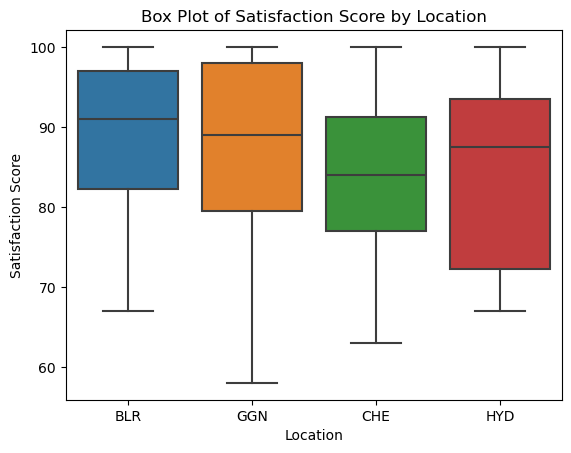

ANOVA F-Statistic: 1.8078235781915044
P-Value: 0.14704232267382497

Fail to reject the null hypothesis: There are no significant differences in Satisfaction Scores between Locations.


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Box plot
sns.boxplot(x='Location', y='Satisfaction Score', data=df)
plt.title('Box Plot of Satisfaction Score by Location')
plt.show()

# Perform ANOVA
grouped = df.groupby('Location')['Satisfaction Score'].apply(list)
f_statistic, p_value = f_oneway(*grouped)

print(f"ANOVA F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There are significant differences in Satisfaction Scores between Locations.")
else:
    print("\nFail to reject the null hypothesis: There are no significant differences in Satisfaction Scores between Locations.")


#### 2. Categorical vs. Categorical: Cross-Tabulation and Chi-Square Test

In [22]:
from scipy.stats import chi2_contingency

# Cross-tabulation
cross_tab = pd.crosstab(stats1['Location'], stats1['Mobile Brand Purchased'])
print(cross_tab)

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between Location and Mobile Brand Purchased.")
else:
    print("There is no significant relationship between Location and Mobile Brand Purchased.")


Mobile Brand Purchased  Apple  Samsung
Location                              
BLR                        24       22
CHE                        34       34
GGN                        32       36
HYD                        10        8
Chi-Square Statistic: 0.5444728616084115
P-value: 0.9090177469316534
There is no significant relationship between Location and Mobile Brand Purchased.


#### 3. Numerical vs. Numerical: Correlation and Scatter Plot

Correlation between Mobile Cost and Satisfaction Score: -0.041215206079813105


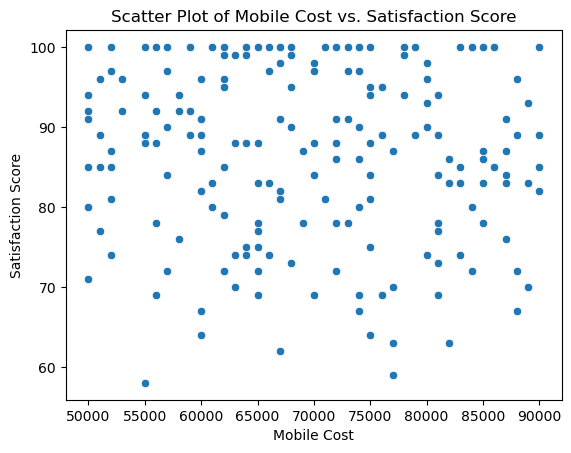

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation
correlation = stats1['Mobile Cost'].corr(stats1['Satisfaction Score'])
print(f"Correlation between Mobile Cost and Satisfaction Score: {correlation}")

# Scatter Plot
sns.scatterplot(x='Mobile Cost', y='Satisfaction Score', data=stats1)
plt.title('Scatter Plot of Mobile Cost vs. Satisfaction Score')
plt.show()
